In [217]:
#Importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
#Read data from csv file
data = pd.read_csv('data/covid_19_data.csv')
data.shape

(2195, 8)

In [219]:
data[data['Province/State'] == 'Hubei'].tail(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
1415,1416,02/14/2020,Hubei,Mainland China,2020-02-14T23:33:02,54406.0,1457.0,4774.0
1490,1491,02/15/2020,Hubei,Mainland China,2020-02-15T23:13:05,56249.0,1596.0,5623.0
1565,1566,02/16/2020,Hubei,Mainland China,2020-02-16T23:53:01,58182.0,1696.0,6639.0
1640,1641,02/17/2020,Hubei,Mainland China,2020-02-17T23:13:06,59989.0,1789.0,7862.0
1715,1716,02/18/2020,Hubei,Mainland China,2020-02-18T23:13:11,61682.0,1921.0,9128.0
1790,1791,02/19/2020,Hubei,Mainland China,2020-02-19T23:23:02,62031.0,2029.0,10337.0
1866,1867,02/20/2020,Hubei,Mainland China,2020-02-20T23:43:02,62442.0,2144.0,11788.0
1942,1943,02/21/2020,Hubei,Mainland China,2020-02-21T13:03:09,62662.0,2144.0,11881.0
2026,2027,02/22/2020,Hubei,Mainland China,2020-02-22T23:33:06,64084.0,2346.0,15299.0
2110,2111,02/23/2020,Hubei,Mainland China,2020-02-23T11:33:03,64084.0,2346.0,15343.0


In [220]:
#Cleanup data on Province/State

def clear_country(record):
    if record['Province/State'] == 'Hong Kong' or record['Province/State'] == 'Macau' or record['Province/State'] == 'Taiwan':
        return record['Province/State']
    elif record['Country/Region'] == 'China':
        return 'Mainland China'
    else: return record['Country/Region']

#Prepare new row with new Country adjustment data

data['Country_arrange'] = data.apply(lambda row : clear_country(row), axis=1)

In [221]:
#Let's remove unnecessary columns from the dataset

data = data.drop_duplicates()
data = data.drop(['SNo','Country/Region'], axis=1)
data = data.rename(columns={'Country_arrange' : 'Country', 'ObservationDate' : 'Date'})
data.head()

,Date,Province/State,Last Update,Confirmed,Deaths,Recovered,Country
0,01/22/2020,Anhui,1/22/2020 17:00,1.0,0.0,0.0,Mainland China
1,01/22/2020,Beijing,1/22/2020 17:00,14.0,0.0,0.0,Mainland China
2,01/22/2020,Chongqing,1/22/2020 17:00,6.0,0.0,0.0,Mainland China
3,01/22/2020,Fujian,1/22/2020 17:00,1.0,0.0,0.0,Mainland China
4,01/22/2020,Gansu,1/22/2020 17:00,0.0,0.0,0.0,Mainland China


In [222]:
#Countries affected by Corona Virus

Countries = data[(data['Country']!='Others') & (data['Country']!='Undisclosed')]['Country'].unique().tolist()
print(Countries)

['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq']


In [223]:
#Total countries affected by COVID-19

print("Total countries affected by COVID-19 :", len(Countries))

Total countries affected by COVID-19 : 37


In [224]:
def get_place(row):
    if row['Province/State'] == 'Hubei':
        return 'Hubei PRC'
    elif row['Country'] == 'Mainland China': 
        return 'Others PRC'
    else: return 'World'
    
data['segment'] = data.apply(lambda row: get_place(row), axis=1)
data.head()

,Date,Province/State,Last Update,Confirmed,Deaths,Recovered,Country,segment
0,01/22/2020,Anhui,1/22/2020 17:00,1.0,0.0,0.0,Mainland China,Others PRC
1,01/22/2020,Beijing,1/22/2020 17:00,14.0,0.0,0.0,Mainland China,Others PRC
2,01/22/2020,Chongqing,1/22/2020 17:00,6.0,0.0,0.0,Mainland China,Others PRC
3,01/22/2020,Fujian,1/22/2020 17:00,1.0,0.0,0.0,Mainland China,Others PRC
4,01/22/2020,Gansu,1/22/2020 17:00,0.0,0.0,0.0,Mainland China,Others PRC


In [225]:
confirm = pd.pivot_table(data.dropna(subset=['Confirmed']), index='Date',
                        columns='segment', values='Confirmed', aggfunc=np.sum).fillna(method='ffill')
confirm['Date'] = confirm.index
confirm.tail(10)

segment,Hubei PRC,Others PRC,World,Date
Date,,,,
02/14/2020,54406.0,11886.0,595.0,02/14/2020
02/15/2020,56249.0,12098.0,685.0,02/15/2020
02/16/2020,58182.0,12264.0,780.0,02/16/2020
02/17/2020,59989.0,12375.0,896.0,02/17/2020
02/18/2020,61682.0,12457.0,999.0,02/18/2020
02/19/2020,62031.0,12515.0,1095.0,02/19/2020
02/20/2020,62442.0,12557.0,1200.0,02/20/2020
02/21/2020,62662.0,12810.0,1371.0,02/21/2020
02/22/2020,64084.0,12838.0,1677.0,02/22/2020


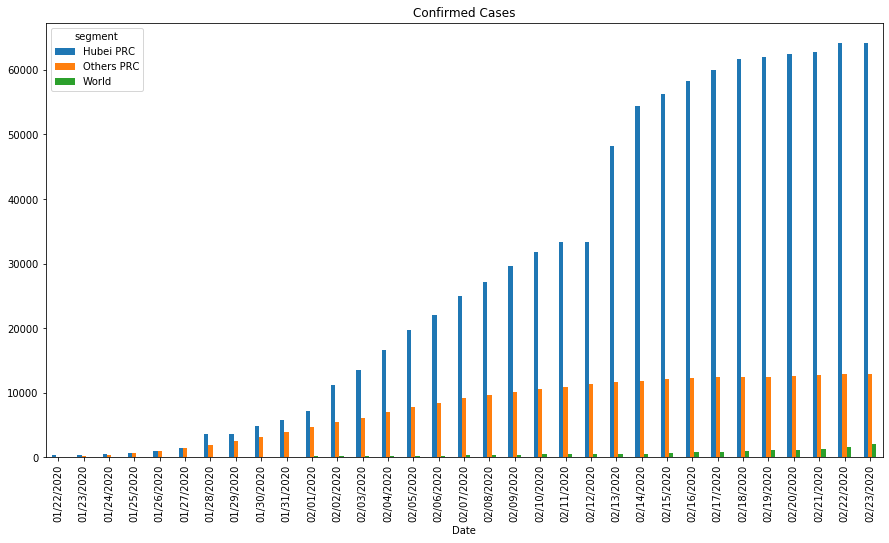

In [226]:
confirm.plot(kind='bar', figsize = (15,8), width = 0.5, align='center', title='Confirmed Cases')

In [235]:
death = pd.pivot_table(data.dropna(subset=['Deaths']),
                      index='Date', columns='segment', values='Deaths', aggfunc=np.sum).fillna(method = 'ffill')
death.tail(10)

segment,Hubei PRC,Others PRC,World
Date,,,
02/14/2020,1457.0,63.0,3.0
02/15/2020,1596.0,66.0,4.0
02/16/2020,1696.0,69.0,5.0
02/17/2020,1789.0,74.0,5.0
02/18/2020,1921.0,81.0,5.0
02/19/2020,2029.0,85.0,8.0
02/20/2020,2144.0,92.0,11.0
02/21/2020,2144.0,92.0,15.0
02/22/2020,2346.0,95.0,17.0


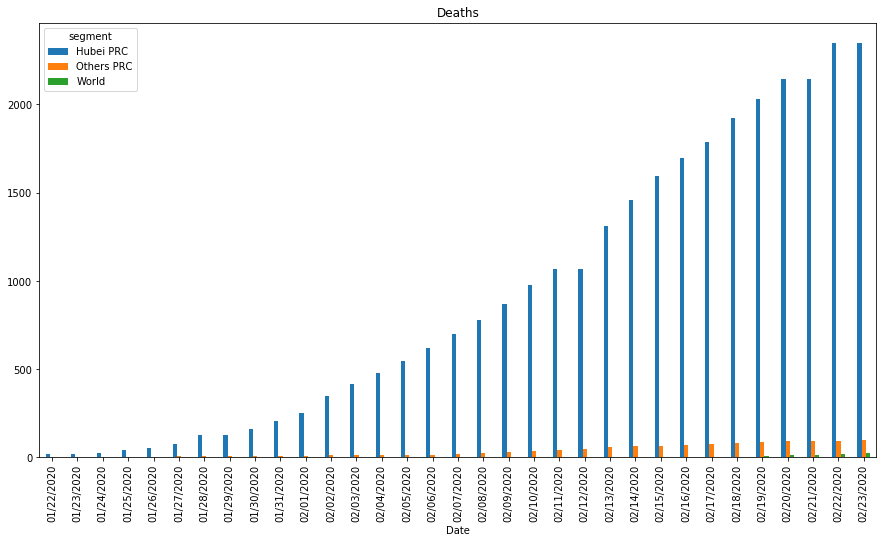

In [228]:
death.plot(kind='bar', figsize = (15,8), width = 0.5, align='center', title='Deaths')

as you can see majority death comes from Hubei province

In [237]:
good = pd.pivot_table(data.dropna(subset=['Recovered']),
                        index = 'Date', columns='segment', values='Recovered', aggfunc=np.sum).fillna(method = 'ffill')
good.tail(10)

segment,Hubei PRC,Others PRC,World
Date,,,
02/14/2020,4774.0,3199.0,85.0
02/15/2020,5623.0,3671.0,101.0
02/16/2020,6639.0,4109.0,117.0
02/17/2020,7862.0,4593.0,128.0
02/18/2020,9128.0,5071.0,153.0
02/19/2020,10337.0,5615.0,169.0
02/20/2020,11788.0,6214.0,175.0
02/21/2020,11881.0,6812.0,197.0
02/22/2020,15299.0,7388.0,199.0


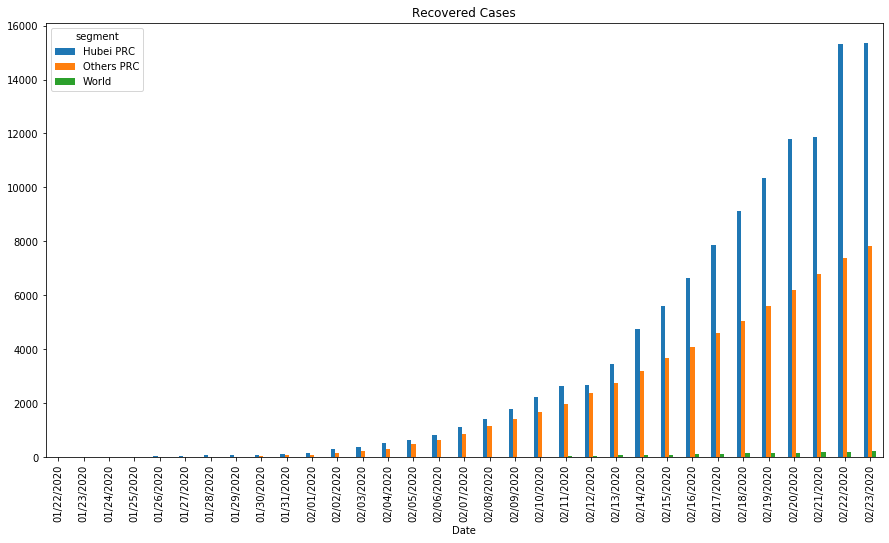

In [238]:
good.plot(kind='bar', figsize=(15, 8), width = 0.5, title='Recovered Cases')

In [231]:
#Max death in One day
Max_deaths = data.Deaths.max()
Max_deaths

2346.0

Text(0, 0.5, 'Death count')

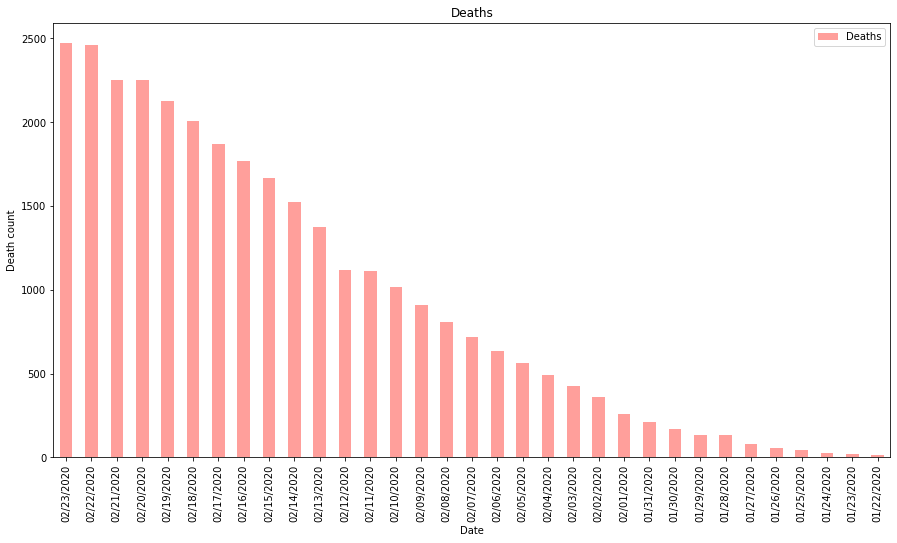

In [232]:
#Day wise death in Hubei PRC

temp_df = data[['Date', 'Deaths']]
death_df = temp_df.groupby(['Date']).sum()
death_df.sort_values('Deaths', ascending=False, inplace=True)
death_df.plot(kind='bar', title='Deaths', figsize=(15, 8), color='r')
plt.ylabel('Death count')

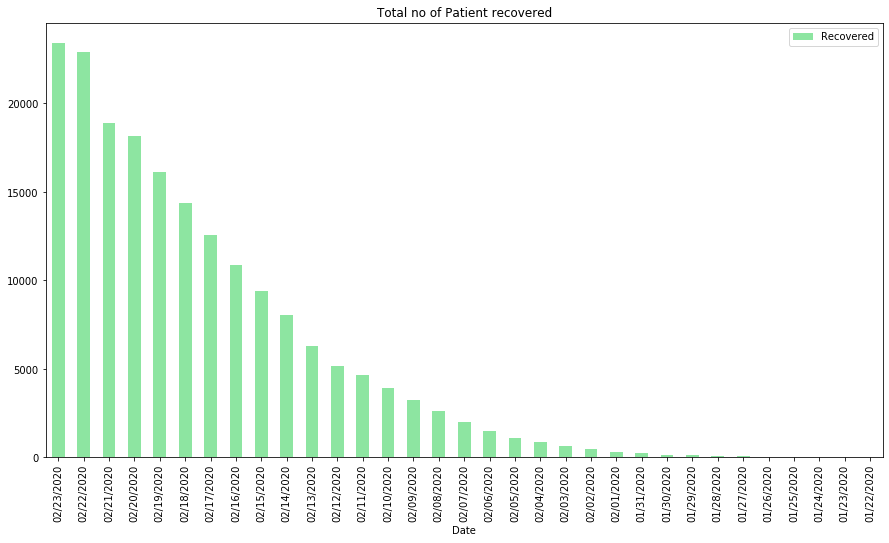

In [233]:
#Day wise Recovered ratio

temp_df = data[['Date','Recovered']]
recover_df = temp_df.groupby(['Date']).sum()
recover_df.sort_values('Recovered', ascending=False, inplace=True)
recover_df.plot(kind='bar', figsize=(15, 8), title='Total no of Patient recovered', color='g')

In [243]:
df = confirm.join(death, lsuffix='_confirm', rsuffix='_death')
df = df.join(good.add_suffix('_recover'))
df['Hubei PRC_death_rate'] = df['Hubei PRC_death']/df['Hubei PRC_confirm']
df['Others PRC_death_rate'] = df['Others PRC_death']/df['Others PRC_confirm']
df['World_death_rate'] = df['World_death']/df['World_confirm']
df['Hubei PRC_recover_rate'] = df['Hubei PRC_recover']/df['Hubei PRC_confirm']
df['Others PRC_recover_rate'] = df['Others PRC_recover']/df['Others PRC_confirm']
df['World_recover_rate'] = df['World_recover']/df['World_confirm']

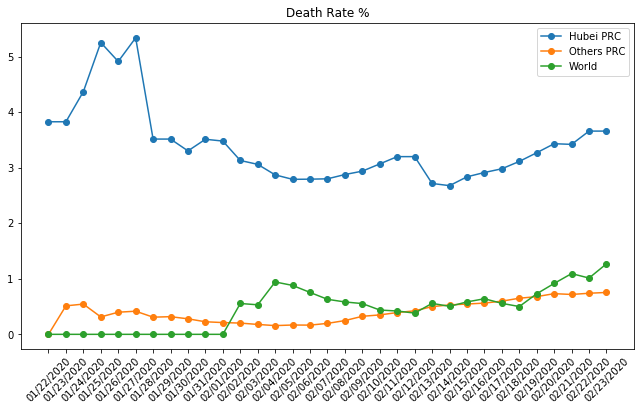

In [245]:
death_rate = df[['Hubei PRC_death_rate', 'Others PRC_death_rate', 'World_death_rate']] * 100
plt.figure(figsize=(11 , 6))
plt.plot(death_rate, marker='o')
plt.title('Death Rate %')
plt.legend(death.columns)
plt.xticks(rotation=45)
plt.show()